In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.font_manager as fm
import geopandas as gpd
import folium
from folium.plugins import HeatMap
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

font_path = "C:\\Users\\Playdata\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Pretendard-Regular.otf"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False

In [151]:
df = pd.read_csv('./data/Life-Expectancy-Data-Averaged.csv')

In [152]:
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status,Life_expectancy
0,Afghanistan,Asia,2007.5,71.08125,98.61250,265.804969,0.016125,64.5625,24.3750,22.46250,55.3750,55.1250,0.022500,408.5625,27.450625,16.58125,15.58125,2.90000,1.0,59.65625
1,Albania,Rest of Europe,2007.5,15.25625,17.14375,83.132969,4.696875,98.0000,95.9375,25.85625,98.1250,98.0625,0.025625,3071.1250,2.969375,1.61875,1.70000,9.24375,1.0,75.95000
2,Algeria,Africa,2007.5,26.75625,31.19375,113.439281,0.400625,88.3125,93.2500,24.86875,91.7500,91.8750,0.021875,3745.1250,34.820625,6.09375,5.97500,6.99375,1.0,73.78750
3,Angola,Africa,2007.5,88.76875,144.16250,297.844063,4.935625,68.8125,64.0000,22.51875,35.7500,55.5625,1.303750,2647.8125,21.623750,6.19375,6.66875,4.60625,1.0,52.82500
4,Antigua and Barbuda,Central America and Caribbean,2007.5,9.47500,11.51875,142.478813,7.755000,98.2500,75.4375,25.85000,96.9375,98.3125,0.125000,14678.7500,0.085000,3.42500,3.37500,9.01875,1.0,75.35000


### 1. 데이터 전처리

##### 1-1 결측값 처리

In [153]:
df.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status                 0
Life_expectancy                0
dtype: int64

* year변수는 2007 하나의 값만 들어가 있기에 모델 예측 변수에서 제외

In [154]:
df.drop(columns=['Year'], inplace=True)

* 존재하지 않는다.

##### 1-2. Scailing

In [155]:
df.describe()

,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status,Life_expectancy
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.793296,68.856075
std,26.725485,42.916952,111.659044,3.914554,13.820223,17.315208,2.165490,13.581153,13.931532,2.311895,16893.054182,136.655286,4.111094,4.195663,3.126912,0.406077,9.197699
min,2.381250,3.000000,57.710313,0.000025,30.687500,16.250000,20.212500,35.750000,31.312500,0.010000,263.937500,0.085000,0.100000,0.100000,1.337500,0.000000,45.606250
25%,8.159375,9.775000,107.046906,1.317813,78.218750,64.000000,23.225000,80.531250,80.812500,0.080000,1409.906250,2.108125,1.756250,1.731250,4.946875,1.000000,62.303125
50%,19.368750,23.137500,164.432406,4.209375,88.000000,83.000000,25.650000,92.375000,92.062500,0.164375,4402.625000,7.660625,3.556250,3.718750,7.831250,1.000000,71.506250
75%,48.959375,68.321875,247.523922,7.843438,94.375000,92.250000,26.425000,96.062500,95.781250,0.516250,12037.781250,22.745313,7.165625,7.056250,10.365625,1.000000,74.937500
max,115.718750,178.725000,572.974312,15.100000,98.875000,99.000000,31.687500,98.937500,99.000000,18.164375,102972.687500,1321.239375,27.100000,27.943750,13.268750,1.000000,82.456250


* 스케일링 대상 컬럼:
    * `Infant_deaths`, `Under_five_deaths`, `Adult_mortality`, `Alcohol_consumption`, `GDP_per_capita`, `Population_mln`, `Incidents_HIV`
    * 해당 컬럼들은 단위와 값의 크기가 매우 다르기 때문에 단위 차이로 인해 모델이 특정 변수에 가중치를 더 두는 것을 방지하기 위해 스케일링이 필요하다. (예: `GDP_per_capita는` 최대값 102,972, `Alcohol_consumption은` 최대값 15.1로 범위가 다름.)

* 스케일링이 불필요한 컬럼
    * `Year`: 모든 값이 동일하므로 스케일링이 불필요.
    * `Hepatitis_B`, `Measles`, `Polio`, `Diphtheria`: 비율(%)로 표현되었기 때문에 0~100 범위에서 이미 적절히 스케일링됨.
    * `Economy_status`: 1혹은 0의 값이 들어가 있는 변수라 스케일링이 필요하지 않음.
    * `Life_expectancy`: 타겟 변수이므로 스케일링이 불필요.

* 스케일링 방법은 Min-Max Scailing 채택 
    * 값의 분포 차이가 크기 때문에 데이터를 0 -1 범위로 변환

In [156]:
columns_to_scale = [
    'Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 
    'Alcohol_consumption', 'GDP_per_capita', 'Population_mln', 'Incidents_HIV'
]

scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df.describe()

,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status,Life_expectancy
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,0.246896,0.227277,0.261112,0.319263,84.292598,77.344972,25.032926,86.499651,86.271648,0.048709,0.109796,0.027696,4.865852,4.899825,7.632123,0.793296,68.856075
std,0.235804,0.244228,0.216703,0.259242,13.820223,17.315208,2.165490,13.581153,13.931532,0.127346,0.164475,0.103436,4.111094,4.195663,3.126912,0.406077,9.197699
min,0.000000,0.000000,0.000000,0.000000,30.687500,16.250000,20.212500,35.750000,31.312500,0.000000,0.000000,0.000000,0.100000,0.100000,1.337500,0.000000,45.606250
25%,0.050982,0.038555,0.095750,0.087271,78.218750,64.000000,23.225000,80.531250,80.812500,0.003856,0.011157,0.001531,1.756250,1.731250,4.946875,1.000000,62.303125
50%,0.149884,0.114597,0.207121,0.278765,88.000000,83.000000,25.650000,92.375000,92.062500,0.008503,0.040295,0.005734,3.556250,3.718750,7.831250,1.000000,71.506250
75%,0.410968,0.371728,0.368381,0.519432,94.375000,92.250000,26.425000,96.062500,95.781250,0.027886,0.114633,0.017152,7.165625,7.056250,10.365625,1.000000,74.937500
max,1.000000,1.000000,1.000000,1.000000,98.875000,99.000000,31.687500,98.937500,99.000000,1.000000,1.000000,1.000000,27.100000,27.943750,13.268750,1.000000,82.456250


##### 1-3. Encoding

In [157]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyan

In [158]:
df.drop(columns=['Country'], inplace=True)

In [159]:
df['Region'].unique()

array(['Asia', 'Rest of Europe', 'Africa',
       'Central America and Caribbean', 'South America', 'Oceania',
       'European Union', 'Middle East', 'North America'], dtype=object)

* `country`변수의 경우 unique개수가 너무 많아 one-hot-encoding이나 label encoding을 할 시 차원의 수가 급격하게 늘어난다는 단점이 존재하여 국가별 지표가 들어있는 다른 컬럼만 사용하는 것으로 결정
* `region`변수의 경우 상대적으로 적은 unique개수를 가지고 있어 one-hot-encoding 진행

In [160]:
region_encoded = pd.get_dummies(df['Region'], prefix='Region')

df = pd.concat([df, region_encoded], axis=1)
df.drop(columns=['Region'], inplace=True)
df.head()

,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,...,Life_expectancy,Region_Africa,Region_Asia,Region_Central America and Caribbean,Region_European Union,Region_Middle East,Region_North America,Region_Oceania,Region_Rest of Europe,Region_South America
0,0.606154,0.544103,0.403860,0.001066,64.5625,24.3750,22.46250,55.3750,55.1250,0.000689,...,59.65625,False,True,False,False,False,False,False,False,False
1,0.113599,0.080488,0.049339,0.311050,98.0000,95.9375,25.85625,98.1250,98.0625,0.000861,...,75.95000,False,False,False,False,False,False,False,True,False
2,0.215066,0.160442,0.108156,0.026530,88.3125,93.2500,24.86875,91.7500,91.8750,0.000654,...,73.78750,True,False,False,False,False,False,False,False,False
3,0.762215,0.803315,0.466040,0.326861,68.8125,64.0000,22.51875,35.7500,55.5625,0.071264,...,52.82500,True,False,False,False,False,False,False,False,False
4,0.062590,0.048478,0.164515,0.513575,98.2500,75.4375,25.85000,96.9375,98.3125,0.006335,...,75.35000,False,False,True,False,False,False,False,False,False


##### 1-5. Target Distribution

In [161]:
target = df['Life_expectancy']
target.value_counts()

Life_expectancy
59.65625    2
72.98750    2
73.64375    2
72.85000    2
52.82500    1
           ..
72.79375    1
74.33125    1
64.16250    1
52.33125    1
48.66250    1
Name: count, Length: 175, dtype: int64

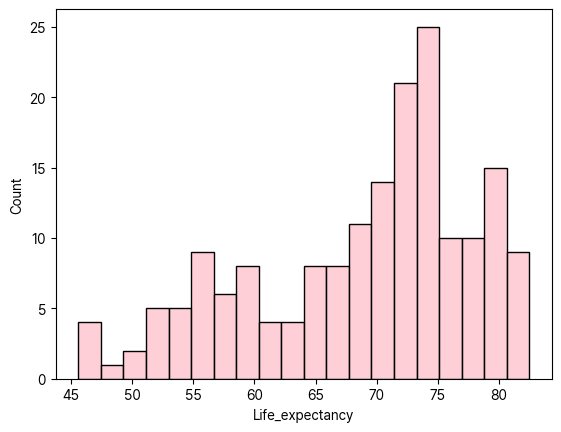

In [162]:
sns.histplot(target, kde=False, bins=20, color='pink')  # bins를 통해 구간 개수를 설정할 수 있음

plt.show()

##### 1-6. Train/Test set 분리

In [163]:
X = df.drop(columns=['Life_expectancy']) 
y = df['Life_expectancy']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 2. 모델 학습

##### 2-1. LinearRegressor

In [164]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred) 

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r2}')

Mean Squared Error (MSE): 1.249533782108599
R-squared: 0.9860837036806871


* scikit learn에서 제공하는 Linear Regression모델에는 기본적으로 최소제곱법을 통해 계수를 최적화하는 방법이 적용된다. 
* 따라서 최적의 계수를 찾는 또 다른 방법인 경사하강법을 통해 모델을 학습 시켜보았다.

In [165]:
from sklearn.linear_model import SGDRegressor

sgd_model = SGDRegressor(max_iter=1000, tol=1e-3)  # max_iter: 반복 횟수, tol: 수렴 기준
sgd_model.fit(X_train, y_train)

y_pred_sgd = sgd_model.predict(X_test)

mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

print(f'MSE (SGD): {mse_sgd}')
print(f'R-squared (SGD): {r2_sgd}')

MSE (SGD): 2.5213831609555767e+25
R-squared (SGD): -2.8081125700476677e+23


* 최소제곱법을 통한 최적화방식으로 학습시킨 모델의 결과가 좋았다.

##### 2-2 RandomForestRegressior

In [166]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print("Random Forest Regressor:")
print(f'Mean Squared Error (MSE): {rf_mse}')
print(f'R-squared: {rf_r2}\n')

Random Forest Regressor:
Mean Squared Error (MSE): 2.0283865377604196
R-squared: 0.9774094718256078



##### 2-3 XGBoost Regressor

In [167]:
xgb_model = xgb.XGBRegressor(random_state=42)

# 데이터 형식 변환 (numpy.ndarray로 변환)
X_train = X_train.values
X_test = X_test.values

# 모델 학습
xgb_model.fit(X_train, y_train)

# 예측
xgb_y_pred = xgb_model.predict(X_test)

# 평가 지표 계산
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)

print(f'Mean Squared Error (MSE): {xgb_mse}')
print(f'R-squared: {xgb_r2}')

Mean Squared Error (MSE): 2.7792438723519606
R-squared: 0.9690470303203671


##### 2-4 LightGBM Regressor

In [168]:
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_y_pred = lgb_model.predict(X_test)

lgb_mse = mean_squared_error(y_test, lgb_y_pred)
lgb_r2 = r2_score(y_test, lgb_y_pred)

print("LightGBM Regressor:")
print(f'Mean Squared Error (MSE): {lgb_mse}')
print(f'R-squared: {lgb_r2}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 706
[LightGBM] [Info] Number of data points in the train set: 143, number of used features: 18
[LightGBM] [Info] Start training from score 68.849475
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [169]:
print("----------------------------------\n")
print("Linear Regressor:")
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r2}\n')
print("----------------------------------\n")
print("Linear Regressor(SGD):")
print(f'MSE (SGD): {mse_sgd}')
print(f'R-squared (SGD): {r2_sgd}\n')
print("----------------------------------\n")
print("Random Forest Regressor:")
print(f'Mean Squared Error (MSE): {rf_mse}')
print(f'R-squared: {rf_r2}\n')
print("----------------------------------\n")
print("XGBoost Regressor:")
print(f'Mean Squared Error (MSE): {xgb_mse}')
print(f'R-squared: {xgb_r2}\n')
print("----------------------------------\n")
print("LightGBM Regressor:")
print(f'Mean Squared Error (MSE): {lgb_mse}')
print(f'R-squared: {lgb_r2}\n')
print("----------------------------------")

----------------------------------

Linear Regressor:
Mean Squared Error (MSE): 1.249533782108599
R-squared: 0.9860837036806871

----------------------------------

Linear Regressor(SGD):
MSE (SGD): 2.5213831609555767e+25
R-squared (SGD): -2.8081125700476677e+23

----------------------------------

Random Forest Regressor:
Mean Squared Error (MSE): 2.0283865377604196
R-squared: 0.9774094718256078

----------------------------------

XGBoost Regressor:
Mean Squared Error (MSE): 2.7792438723519606
R-squared: 0.9690470303203671

----------------------------------

LightGBM Regressor:
Mean Squared Error (MSE): 2.8809864614471232
R-squared: 0.9679139036787223

----------------------------------


### 모델 성능을 높히기 위한 시도

##### log scailing

>데이터 분포의 왜곡을 완화하여 정규성을 확보하기 위해 로그 변환이 필요한 컬럼을 확인

* GDP per capita

    * 값의 범위가 매우 넓고, 일부 국가에서 GDP가 극단적으로 높은 경우가 있음.
로그 변환을 통해 GDP가 작은 국가들의 변화를 강조할 수 있음.

* Population

    * 인구 규모가 몇만에서 몇억까지 차이 날 가능성이 있음.
일부 국가(예: 중국, 인도)의 인구 수가 매우 크기 때문에, 로그 변환을 통해 작은 나라와의 차이를 줄이는 것이 좋음.

* Hepatitis B

    * 특정 값(예: 0, 100)에 몰려 있을 가능성이 있음.
비율 데이터이므로 로그 변환을 고려할 수 있음.

* Income status (Economy status)

    * 경제 수준(예: 저소득, 고소득)이 카테고리형 데이터일 가능성이 있음.
수치화된 데이터라면 로그 변환을 고려할 수 있음.

* Incidents of HIV

    * HIV 발생률은 일부 지역에서 매우 높고, 일부 지역에서는 거의 0에 가까울 가능성이 있음.
로그 변환을 하면 극단적으로 높은 값을 완화할 수 있음.


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Infant_deaths                         179 non-null    float64
 1   Under_five_deaths                     179 non-null    float64
 2   Adult_mortality                       179 non-null    float64
 3   Alcohol_consumption                   179 non-null    float64
 4   Hepatitis_B                           179 non-null    float64
 5   Measles                               179 non-null    float64
 6   BMI                                   179 non-null    float64
 7   Polio                                 179 non-null    float64
 8   Diphtheria                            179 non-null    float64
 9   Incidents_HIV                         179 non-null    float64
 10  GDP_per_capita                        179 non-null    float64
 11  Population_mln     

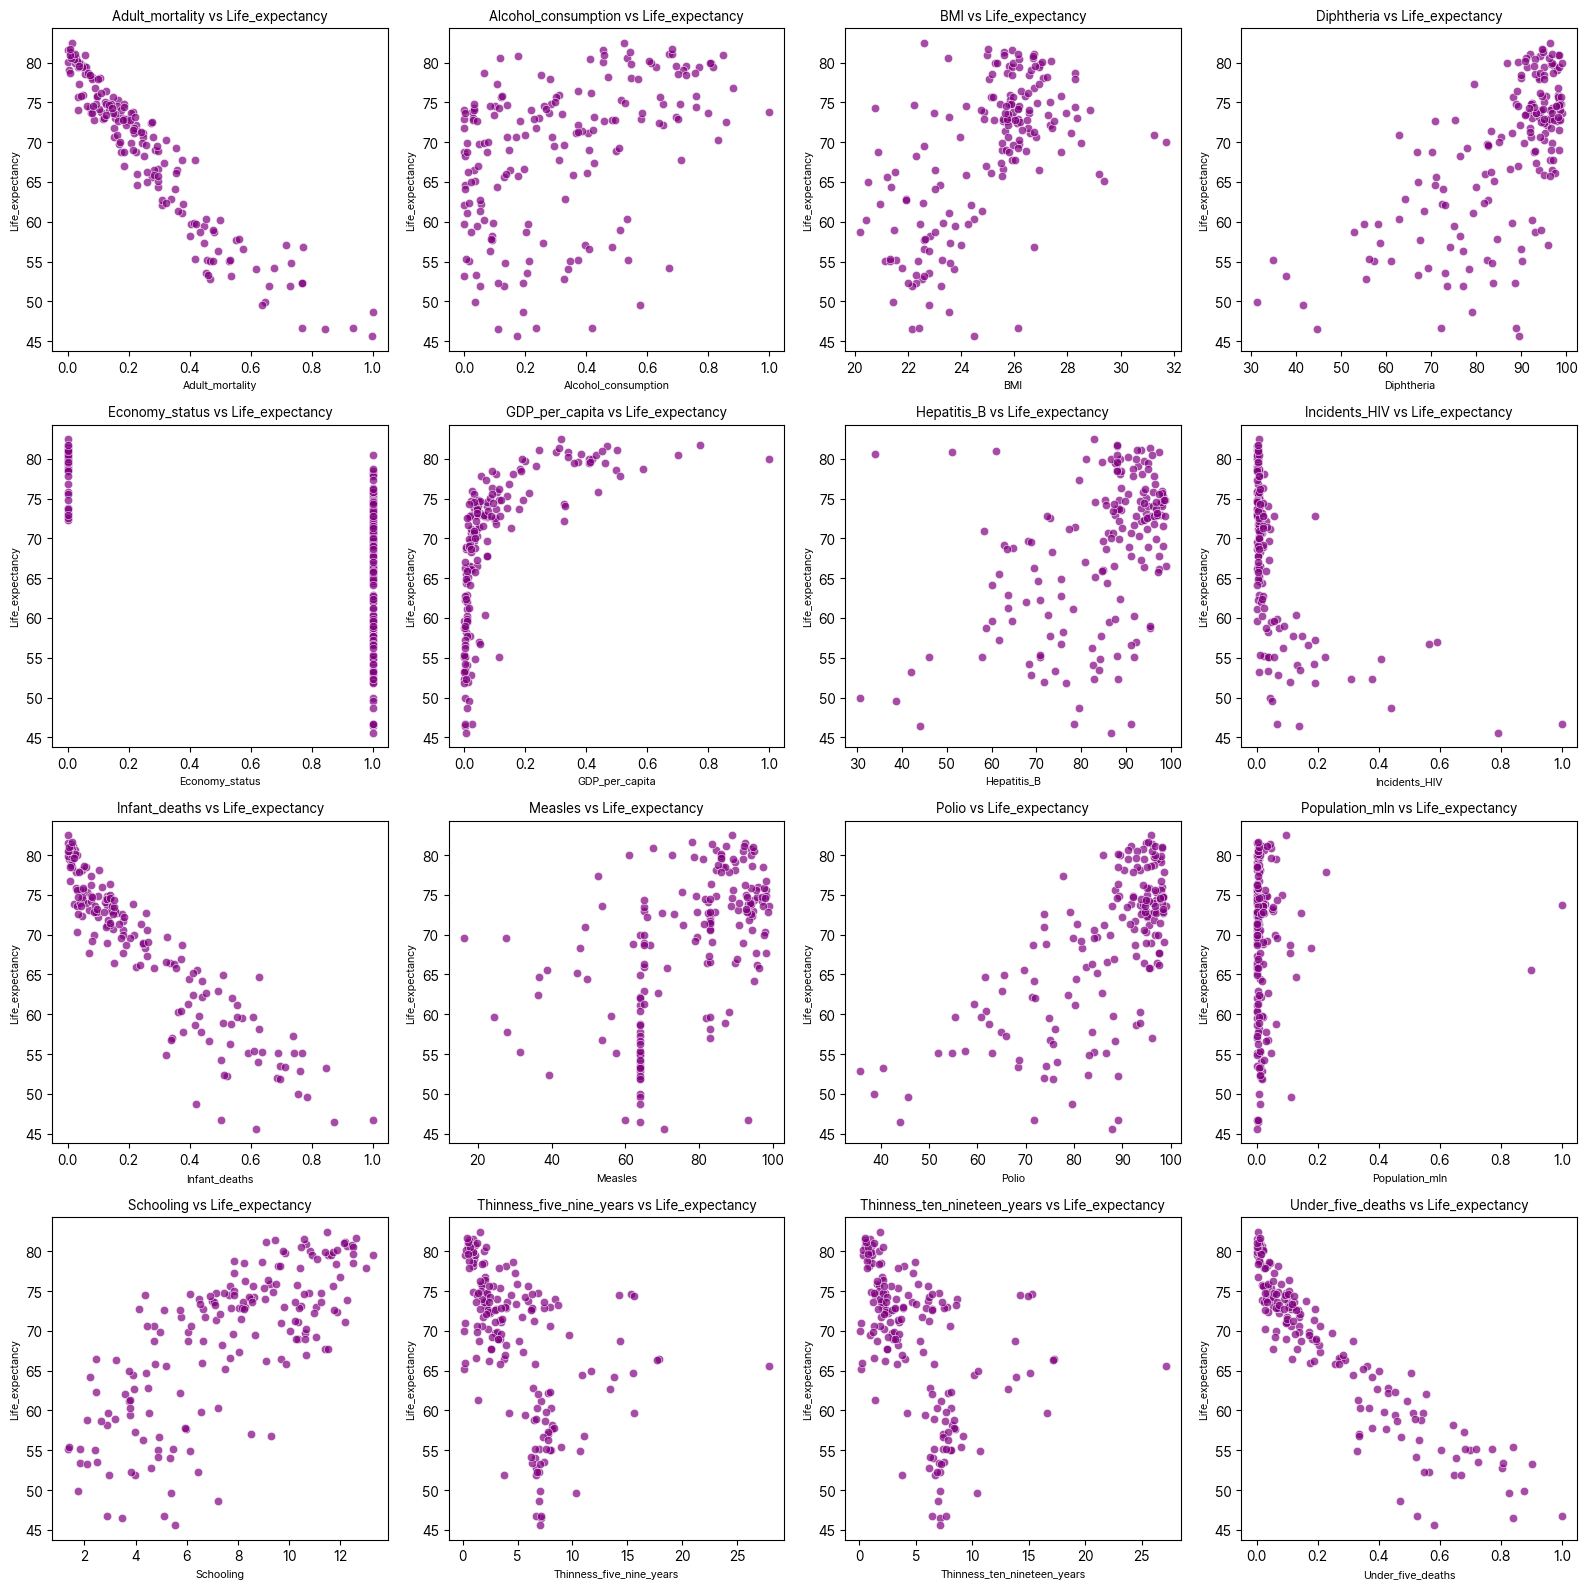

In [171]:
target = 'Life_expectancy'  
features = df.select_dtypes(include=['number']).columns.difference([target])

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

for i, feature in enumerate(features):
    row = i // 4  
    col = i % 4   
    sns.scatterplot(x=df[feature], y=df[target], ax=axes[row, col], color='purple', alpha=0.7)
    axes[row, col].set_title(f"{feature} vs {target}", fontsize=10)
    axes[row, col].set_xlabel(feature, fontsize=8)
    axes[row, col].set_ylabel(target, fontsize=8)

plt.tight_layout()
plt.show()

In [172]:
df_log = df.copy()
df_log['GDP_per_capita_log'] = np.log(df['GDP_per_capita'])
df_log['Population_log'] = np.log(df['Population_mln'])
df_log['HepatitisB_log'] = np.log1p(df['Hepatitis_B']) 
df_log['HIV_Incidents_log'] = np.log1p(df['Incidents_HIV'])
df_log.drop(columns=['GDP_per_capita', 'Population_mln', 'Hepatitis_B', 'Incidents_HIV'], inplace=True)

c:\Users\Playdata\AppData\Local\anaconda3\envs\new\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Playdata\AppData\Local\anaconda3\envs\new\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


* 위에서 학습 시킨 모델을 하나의 함수로 만들어서 한 번에 성능 비교

In [173]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "Linear Regression": LinearRegression(),
        "SGD Regressor": SGDRegressor(max_iter=1000, tol=1e-3),
        "Random Forest": RandomForestRegressor(random_state=42),
        "XGBoost": xgb.XGBRegressor(random_state=42),
        "LightGBM": lgb.LGBMRegressor(random_state=42),
    }
    
    results = {}

    for name, model in models.items():
        # XGBoost와 LightGBM의 경우 numpy 배열로 변환 필요
        if isinstance(model, (xgb.XGBRegressor, lgb.LGBMRegressor)):
            X_train_np, X_test_np = X_train.values, X_test.values
        else:
            X_train_np, X_test_np = X_train, X_test

        # 모델 학습
        model.fit(X_train_np, y_train)

        # 예측
        y_pred = model.predict(X_test_np)

        # 평가 지표 계산
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # 결과 저장
        results[name] = {"MSE": mse, "R2": r2}

        # 결과 출력
        print(f"{name}:")
        print(f"  Mean Squared Error (MSE): {mse:.4f}")
        print(f"  R-squared: {r2:.4f}")
        print("-" * 40)

    return results


In [174]:
df_log.describe()

c:\Users\Playdata\AppData\Local\anaconda3\envs\new\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\Playdata\AppData\Local\anaconda3\envs\new\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Measles,BMI,Polio,Diphtheria,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status,Life_expectancy,GDP_per_capita_log,Population_log,HepatitisB_log,HIV_Incidents_log
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,1.790000e+02,179.000000,179.000000,179.000000
mean,0.246896,0.227277,0.261112,0.319263,77.344972,25.032926,86.499651,86.271648,4.865852,4.899825,7.632123,0.793296,68.856075,-inf,-inf,4.429309,0.042070
std,0.235804,0.244228,0.216703,0.259242,17.315208,2.165490,13.581153,13.931532,4.111094,4.195663,3.126912,0.406077,9.197699,NaN,NaN,0.197031,0.098034
min,0.000000,0.000000,0.000000,0.000000,16.250000,20.212500,35.750000,31.312500,0.100000,0.100000,1.337500,0.000000,45.606250,-inf,-inf,3.455922,0.000000
25%,0.050982,0.038555,0.095750,0.087271,64.000000,23.225000,80.531250,80.812500,1.756250,1.731250,4.946875,1.000000,62.303125,-4.495650e+00,-6.482086,4.372212,0.003848
50%,0.149884,0.114597,0.207121,0.278765,83.000000,25.650000,92.375000,92.062500,3.556250,3.718750,7.831250,1.000000,71.506250,-3.211519e+00,-5.161325,4.488636,0.008468
75%,0.410968,0.371728,0.368381,0.519432,92.250000,26.425000,96.062500,95.781250,7.165625,7.056250,10.365625,1.000000,74.937500,-2.166020e+00,-4.066035,4.557816,0.027502
max,1.000000,1.000000,1.000000,1.000000,99.000000,31.687500,98.937500,99.000000,27.100000,27.943750,13.268750,1.000000,82.456250,2.220446e-16,0.000000,4.603919,0.693147


##### 상관계수 확인을 통해 유의미한 변수 추축

In [175]:
correlation_matrix = df.corr()
life_expectancy_corr = correlation_matrix["Life_expectancy"].sort_values(ascending=False)

# 상위 몇 개 변수 출력
print("Life_expectancy와의 상관계수:")
print(life_expectancy_corr)


Life_expectancy와의 상관계수:
Life_expectancy                         1.000000
Schooling                               0.737911
Polio                                   0.682368
Diphtheria                              0.666607
GDP_per_capita                          0.594944
BMI                                     0.594403
Measles                                 0.529514
Hepatitis_B                             0.451723
Alcohol_consumption                     0.416061
Region_European Union                   0.407081
Region_Rest of Europe                   0.186936
Region_Middle East                      0.162583
Region_Central America and Caribbean    0.134558
Region_North America                    0.127905
Region_South America                    0.114702
Region_Asia                             0.027515
Population_mln                          0.023860
Region_Oceania                          0.018456
Thinness_five_nine_years               -0.494168
Thinness_ten_nineteen_years            -0.505

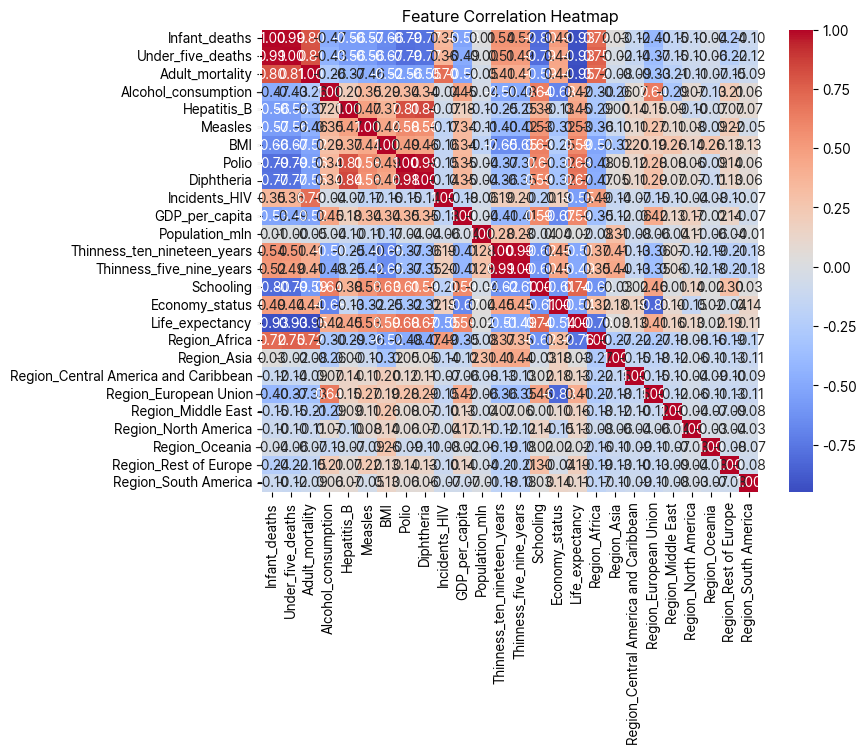

In [176]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [177]:
# 선택된 유의미한 변수들 (음의 상관계수 변수 포함)
selected_features = ['Schooling', 'Polio', 'Diphtheria', 'GDP_per_capita', 
                     'BMI', 'Measles', 'Hepatitis_B', 'Alcohol_consumption', 
                     'Region_European Union', 'Region_Rest of Europe', 
                     'Adult_mortality', 'Infant_deaths', 'Under_five_deaths', 
                     'Economy_status', 'Incidents_HIV', 'Region_Africa']

# 목표 변수 (타겟 변수)
target = 'Life_expectancy'

# 데이터셋에서 선택된 변수들만 사용
X = df[selected_features]
y = df[target]

# Train-test 셋 분리 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [178]:
train_and_evaluate_models(X_train, X_test, y_train, y_test)

Linear Regression:
  Mean Squared Error (MSE): 1.0877
  R-squared: 0.9879
----------------------------------------
SGD Regressor:
  Mean Squared Error (MSE): 767171716954003937221935104.0000
  R-squared: -8544137896705600190939136.0000
----------------------------------------
Random Forest:
  Mean Squared Error (MSE): 1.7226
  R-squared: 0.9808
----------------------------------------
XGBoost:
  Mean Squared Error (MSE): 3.0478
  R-squared: 0.9661
----------------------------------------
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 560
[LightGBM] [Info] Number of data points in the train set: 143, number of used features: 15
[LightGBM] [Info] Start training from score 68.849475
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

{'Linear Regression': {'MSE': np.float64(1.0876524341455964),
  'R2': 0.9878866071628334},
 'SGD Regressor': {'MSE': np.float64(7.67171716954004e+26),
  'R2': -8.5441378967056e+24},
 'Random Forest': {'MSE': np.float64(1.7226212148437778),
  'R2': 0.9808148386102479},
 'XGBoost': {'MSE': np.float64(3.047776067896242), 'R2': 0.9660563359846256},
 'LightGBM': {'MSE': np.float64(2.7016689849503397), 'R2': 0.9699109966536315}}


랜덤 포레스트 피처 중요도:
                                 Feature  Importance
1                      Under_five_deaths    0.765449
2                        Adult_mortality    0.180264
0                          Infant_deaths    0.028056
10                        GDP_per_capita    0.003535
11                        Population_mln    0.002840
3                    Alcohol_consumption    0.002826
9                          Incidents_HIV    0.002620
13              Thinness_five_nine_years    0.002525
6                                    BMI    0.002103
12           Thinness_ten_nineteen_years    0.002028
14                             Schooling    0.001614
8                             Diphtheria    0.001399
4                            Hepatitis_B    0.001371
7                                  Polio    0.000906
5                                Measles    0.000786
16                         Region_Africa    0.000546
18  Region_Central America and Caribbean    0.000396
22                        Reg

C:\Users\Playdata\AppData\Local\Temp\ipykernel_11784\678084767.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances["Importance"], y=feature_importances["Feature"], palette="viridis")


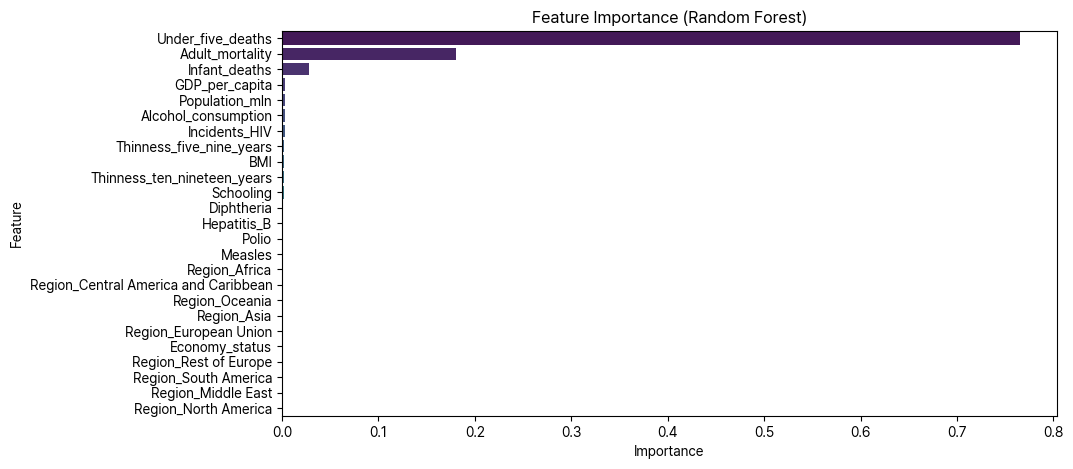

In [179]:
# 2. 랜덤 포레스트를 이용한 피처 중요도 분석
X = df.drop(columns=["Life_expectancy"])  # 타겟 변수 제거
y = df["Life_expectancy"]

# 랜덤 포레스트 모델 훈련
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# 피처 중요도 계산
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# 결과 출력
print("\n랜덤 포레스트 피처 중요도:")
print(feature_importances)

# 피처 중요도 시각화
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances["Importance"], y=feature_importances["Feature"], palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

##### 앙상블

* 배깅 기법 (RandomForest Regressor)

In [180]:
# RandomForest 모델 훈련
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test)

# 성능 평가
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest 성능 평가:")
print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")
print(f"R2: {r2_rf}")

Random Forest 성능 평가:
MAE: 1.092361111111129
MSE: 1.7226212148437778
R2: 0.9808148386102479


* GradientBoosting Regressor (부스팅 기법)

In [181]:
# GradientBoosting 모델 훈련
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# 예측
y_pred_gb = gb_model.predict(X_test)

# 성능 평가
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting 성능 평가:")
print(f"MAE: {mae_gb}")
print(f"MSE: {mse_gb}")
print(f"R2: {r2_gb}")



Gradient Boosting 성능 평가:
MAE: 1.0655143625482648
MSE: 1.6728690194425864
R2: 0.9813689383101943


* 앙상블 결과 결합 - 보팅

In [182]:
# VotingRegressor 생성
voting_model = VotingRegressor([
    ('rf', rf_model), 
    ('gb', gb_model)
])

# 학습
voting_model.fit(X_train, y_train)

# 예측
y_pred_voting = voting_model.predict(X_test)

# 성능 평가 함수
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} 성능 평가:")
    print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, R2: {r2:.4f}\n")

# 개별 모델 평가
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")

Random Forest 성능 평가:
MAE: 1.0924, MSE: 1.7226, R2: 0.9808

Gradient Boosting 성능 평가:
MAE: 1.0655, MSE: 1.6729, R2: 0.9814



* 앙상블 결과 결합시 성능이 가장 좋음

##### GridSearch

* xgboost regressor

In [183]:
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}
xgb_reg = XGBRegressor()
grid_search = GridSearchCV(xgb_reg, param_grid, cv=5,verbose=1)
grid_search.fit(X_train,y_train)
print("최적의 파라미터:", grid_search.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
최적의 파라미터: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


In [184]:
xgb_reg = XGBRegressor(learning_rate = 0.1, max_depth= 5, n_estimators= 200, subsample= 0.8)

xgb_reg.fit(X_train,y_train)

# 예측
xgb_reg_predict = xgb_reg.predict(X_test)

# 성능 평가
mae_xgb = mean_absolute_error(y_test, xgb_reg_predict)
mse_xgb = mean_squared_error(y_test, xgb_reg_predict)
r2_xgb = r2_score(y_test, xgb_reg_predict)

print("\nXGBoost 성능 평가:")
print(f"MAE: {mae_xgb}")
print(f"MSE: {mse_xgb}")
print(f"R2: {r2_xgb}")



XGBoost 성능 평가:
MAE: 1.2093099806043834
MSE: 2.389244131430557
R2: 0.9733905319021801


In [185]:

# RandomForest 하이퍼파라미터 그리드
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# GradientBoosting 하이퍼파라미터 그리드
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
}

# RandomForest 최적화
gs_rf = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
gs_rf.fit(X_train, y_train)
print("Best RF Params:", gs_rf.best_params_)

# GradientBoosting 최적화
gs_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
gs_gb.fit(X_train, y_train)
print("Best GB Params:", gs_gb.best_params_)

# 최적 모델로 예측
y_pred_rf = gs_rf.best_estimator_.predict(X_test)
y_pred_gb = gs_gb.best_estimator_.predict(X_test)

# VotingRegressor 생성
voting_model = VotingRegressor([
    ('rf', gs_rf.best_estimator_), 
    ('gb', gs_gb.best_estimator_)
])

# 학습
voting_model.fit(X_train, y_train)

# 예측
y_pred_voting = voting_model.predict(X_test)

# 성능 평가 함수
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} 성능 평가:")
    print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, R2: {r2:.4f}\n")

# 개별 모델 평가
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")

# VotingRegressor 평가
evaluate_model(y_test, y_pred_voting, "Voting Ensemble (RF + GB)")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best RF Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best GB Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Random Forest 성능 평가:
MAE: 1.1335, MSE: 1.8596, R2: 0.9793

Gradient Boosting 성능 평가:
MAE: 1.0655, MSE: 1.6729, R2: 0.9814

Voting Ensemble (RF + GB) 성능 평가:
MAE: 1.0610, MSE: 1.6349, R2: 0.9818



### 한국 기대수명 예측

In [200]:
df_korea = pd.read_csv("./data/include_korea.csv")
df_korea.tail()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status,Life_expectancy
175,Vietnam,Asia,2007.5,19.50000,24.47500,133.054406,1.742500,87.4375,65.0000,20.76250,94.9375,91.7500,0.196875,1807.8750,86.032500,14.92500,15.6250,6.9000,1,74.33125
176,"Yemen, Rep.",Middle East,2007.5,52.44375,69.57500,239.653938,0.047000,60.1875,95.0000,23.02500,71.6250,72.6250,0.025000,2406.8125,21.730625,13.83125,13.7500,2.2250,1,64.16250
177,Zambia,Africa,2007.5,60.58125,99.20625,452.761219,2.903125,82.8750,39.1875,22.00000,82.9375,83.8125,6.868125,1059.8750,12.862500,6.88125,6.7625,6.4375,1,52.33125
178,Zimbabwe,Africa,2007.5,50.16875,85.32500,572.974312,2.900625,79.5625,64.0000,23.54375,79.5625,79.1250,8.006250,1290.6250,12.538750,7.01250,6.9875,7.2125,1,48.66250
179,Korea,Asia,2007.5,3.50000,0.95677,4.984000,9.480000,94.5000,96.4000,23.90000,86.3000,86.3000,0.800000,19730.0000,48.680000,5.85000,6.2300,11.3600,1,79.16000


In [201]:
df_korea_row = df_korea.iloc[179:]
korea_life = df_korea_row['Life_expectancy']

In [202]:

# 1. 'Region' 컬럼의 원-핫 인코딩 적용
region_encoded_row = pd.get_dummies(df_korea['Region'], prefix='Region')

# 2. 'Region' 컬럼을 삭제하고, 원-핫 인코딩된 컬럼을 추가
df_korea = df_korea.drop(columns=['Region'])
df_korea = pd.concat([df_korea, region_encoded], axis=1)


In [203]:
selected_features = ['Schooling', 'Polio', 'Diphtheria', 'GDP_per_capita', 
                     'BMI', 'Measles', 'Hepatitis_B', 'Alcohol_consumption', 
                     'Region_European Union', 'Region_Rest of Europe', 
                     'Adult_mortality', 'Infant_deaths', 'Under_five_deaths', 
                     'Economy_status', 'Incidents_HIV', 'Region_Africa']

In [204]:
# 3. 필요한 컬럼만 남기고 나머지 컬럼 삭제
df_korea = df_korea[selected_features]

# 4. 컬럼 스케일링 (필요한 컬럼만 스케일링)
scaler = MinMaxScaler()
columns_to_scale = [
    'Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 
    'Alcohol_consumption', 'GDP_per_capita', 'Incidents_HIV'
]

# 'df_korea'를 이 컬럼에 대해서만 스케일링
df_korea[columns_to_scale] = scaler.fit_transform(df_korea[columns_to_scale])


In [205]:
df_korea_row = df_korea.iloc[179:]

# 인코딩시 False로 들어가야하는 NaN 값을 False로 처리
df_korea_row[selected_features] = df_korea_row[selected_features].fillna(False)

# X_row가 1D 배열인 상태에서 2D 배열로 변환
X_row = df_korea_row[selected_features].values.reshape(1, -1)

# 예측 수행
y_pred_korea = voting_model.predict(X_row)

# 예측 결과 출력
print(f"예측된 기대수명: {y_pred_korea[0]} | 실제 기대수명: {korea_life}")

예측된 기대수명: 80.45730737713512 | 실제 기대수명: 179    79.16
Name: Life_expectancy, dtype: float64


C:\Users\Playdata\AppData\Local\Temp\ipykernel_11784\2037492824.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_korea_row[selected_features] = df_korea_row[selected_features].fillna(False)
C:\Users\Playdata\AppData\Local\Temp\ipykernel_11784\2037492824.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_korea_row[selected_features] = df_korea_row[selected_features].fillna(False)
c:\Users\Playdata\AppData\Local\anaconda3\envs\new\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but 